Mandelbrot set implementation

In [5]:
import cmath
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.stats import qmc
from scipy import stats
import sympy

In [6]:
def mandelbrot_iterations(c, max_iterations):
    z = 0
    n = 0
    while abs(z) <= 2 and n < max_iterations:
        z = z**2 + c
        n += 1
    return n

In [154]:
# x = np.linspace(-2, 2, 1000)
# y = np.linspace(-2, 2, 1000)
# x_grid, y_grid = np.meshgrid(x, y)

# complex_grid = x_grid - y_grid * 1j
# max_iterations = 201

# c_list_in_x = []
# c_list_in_y = []

# c_list_out_x = []
# c_list_out_y = []
# color_out = []
# for c_row in complex_grid:
#     for c in c_row:
#         n =  mandelbrot_iterations(c, max_iterations)
#         if n == max_iterations:
#             c_list_in_x.append(c.real)
#             c_list_in_y.append(c.imag)
#         else:
#             percentage_diverge = (n/max_iterations)*100
#             c_list_out_x.append(c.real)
#             c_list_out_y.append(c.imag)
#             color_out.append(percentage_diverge)

for i in range(len(color_out)):
    if color_out[i] <= 2:
        plt.plot(c_list_out_x[i],c_list_out_y[i], marker = 'o', ls = 'none', markersize = 1.5, color = (0,0,color_out[i]/2))
    elif color_out[i] <= 4:
        plt.plot(c_list_out_x[i],c_list_out_y[i], marker = 'o', ls = 'none', markersize = 1.5, color = ((color_out[i]-2)/2,0,1))
    else:
        plt.plot(c_list_out_x[i],c_list_out_y[i], marker = 'o', ls = 'none', markersize = 1.5, color = (1,(color_out[i]-4)/96,0))
    

plt.plot(c_list_in_x,c_list_in_y, marker = 'o', ls = 'none', markersize = 1.5, color = (0,0,0))
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.gca().set_aspect("equal")
plt.axis("off")
plt.tight_layout()
plt.show()

for i in range(len(color_out)):
    if color_out[i] <= 2:
        plt.plot(c_list_out_x[i],c_list_out_y[i], marker = 'o', ls = 'none', markersize = 1.5, color = (0,0,color_out[i]/2))
    elif color_out[i] <= 4:
        plt.plot(c_list_out_x[i],c_list_out_y[i], marker = 'o', ls = 'none', markersize = 1.5, color = ((color_out[i]-2)/2,0,1))
    else:
        plt.plot(c_list_out_x[i],c_list_out_y[i], marker = 'o', ls = 'none', markersize = 1.5, color = (1,(color_out[i]-4)/96,0))

plt.plot(c_list_in_x,c_list_in_y, marker = 'o', ls = 'none', markersize = 1.5, color = (0,0,0))
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlim(-0.3, 0.1)
plt.ylim(0.6, 0.9)
plt.gca().set_aspect("equal")
plt.axis("off")
plt.tight_layout()
plt.show()

In [1]:
def random_sampling(samples, visual = 'no', xmin = -2, xmax = 2, ymin = -2, ymax = 2):
    c_list = []
    x_list, y_list = [], []

    for s in range(1, samples):
        x, y = np.random.uniform(xmin, xmax), np.random.uniform(ymin, ymax)
        x_list.append(x)
        y_list.append(y)
        c = x - y * 1j
        c_list.append(c)

    if visual == 'visualise':
        return c_list, x_list, y_list
    else:
        return c_list

In [2]:
def hypercube_or_ortho(samples, sample_type = 'hyper', visual = 'no', xmin = -2, xmax = 2, ymin = -2, ymax = 2):
    if sample_type == 'hyper':
        sampler = qmc.LatinHypercube(d = 2)    
    elif sample_type == 'ortho':
        sampler = qmc.LatinHypercube(d = 2, strength = 2)

    sample = sampler.random(n = samples)
    l_bounds = [xmin, ymin]
    u_bounds = [xmax, ymax]
    sample_scaled = qmc.scale(sample, l_bounds, u_bounds)
    x_list = sample_scaled[:, 0]
    y_list = sample_scaled[:, 1]
    
    c_list = []
    for ax in range(len(x_list)):
        c = x_list[ax] - y_list[ax] * 1j
        c_list.append(c)

    if visual == 'visualise':
        return c_list, x_list, y_list
    else:
        return c_list

In [15]:
def area_mandelbrot(max_iter, samples_raw, runs, sampling_type = 'random', visual = 'no', tot_area=16):
    if sampling_type == 'random_test':
        samples = samples_raw
    else:
        for s in sympy.primerange(0, np.sqrt(samples_raw)):
            if s**2 < samples_raw:
                samples = s**2
        print(samples)
    area_runs = []
    for r in range(runs):
        in_num = 0
        if sampling_type == 'random' or 'random_test':
            if visual == 'visualise':
                c_list, x_list, y_list = random_sampling(samples, 'visualise')
            else:
                c_list = random_sampling(samples)
        elif sampling_type == 'hyper':
            if visual == 'visualise':
                c_list, x_list, y_list = hypercube_or_ortho(samples, 'hyper', 'visualise')
            else:
                c_list = hypercube_or_ortho(samples)
        elif sampling_type == 'ortho':
            if visual == 'visualise':
                c_list, x_list, y_list = hypercube_or_ortho(samples, 'ortho', 'visualise')
            else:
                c_list = hypercube_or_ortho(samples, 'ortho')
        
        for c in c_list:
            n =  mandelbrot_iterations(c, max_iter)
            if n == max_iter:
                in_num += 1
        area_runs.append((in_num/samples)*tot_area)

    area = np.mean(area_runs)
    std = np.std(area_runs)
    if visual == 'visualise':
        return area, std, x_list, y_list
    else:
        return area, std, area_runs

# def area_mandelbrot(max_iter, samples, runs, xmin = -2, xmax = 2, ymin = -2, ymax = 2):
#     tot_area = (abs(xmin)+abs(xmax))*(abs(ymin)+abs(ymax))

#     area_runs = []
#     for r in range(runs):
#         in_num = 0
#         for s in range(1, samples):
#             x, y = np.random.uniform(xmin, xmax), np.random.uniform(ymin, ymax)
#             c = x - y * 1j
#             n =  mandelbrot_iterations(c, max_iter)
#             if n == max_iter:
#                 in_num += 1
#         area_runs.append((in_num/samples)*tot_area)

#     area_s = np.mean(area_runs)
#     std_area_s = np.std(area_runs)
#     return area_s, std_area_s

In [99]:
samples = 501
iterations = 501
runs = 1000

j_list = []
for j in range(6, iterations, 10):
    j_list.append(j)

diffs_sample = []
sample_list = []
for sample in range(100, samples, 100):
    print(sample)
    sample_list.append(sample)

    total = area_mandelbrot(iterations,sample,runs, 'random_test')[0]
    diffs = []
    for j in j_list:
        area = area_mandelbrot(j, sample, runs, 'random_test')[0]
        diffs.append(abs(total-area))

    diffs_sample.append(diffs)

# for index in range(len(diffs_sample)):
#     print(index)
#     plt.plot(j_list, diffs_sample[index], label = f"Sample size = {sample_list[index]}", c='green', alpha = (index+1)/6)

# plt.legend()
# plt.ylabel('$|A_{i,s} - A_{j,s}|$')
# plt.xlabel('j')
# plt.show()

# for index in range(len(diffs_sample)):
#     print(index)
#     plt.plot(j_list, diffs_sample[index], label = f"Sample size = {sample_list[index]}", c='green', alpha = (index+1)/6)

# plt.legend()
# plt.ylabel('$|A_{i,s} - A_{j,s}|$')
# plt.xlabel('j')
# plt.xlim(100,500)
# plt.show()

100
200
300
400
500


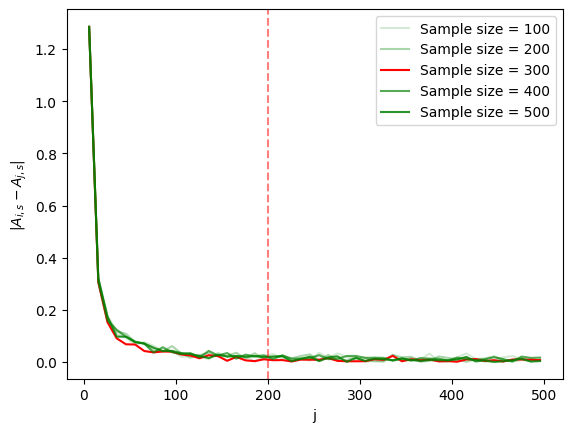

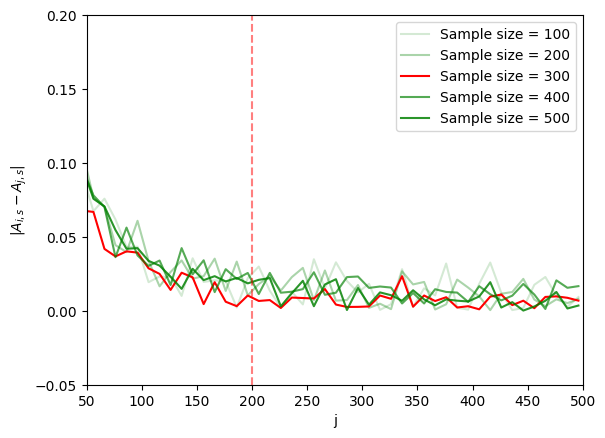

In [113]:
for index in range(len(diffs_sample)):
    if index == 1:
        plt.plot(j_list, diffs_sample[index], label = f"Sample size = {sample_list[index]}", c='red')
    else:
        plt.plot(j_list, diffs_sample[index], label = f"Sample size = {sample_list[index]}", c='green', alpha = (index+1)/6)

plt.legend()
plt.ylabel('$|A_{i,s} - A_{j,s}|$')
plt.xlabel('j')
plt.axvline(x = 200, color = 'red', linestyle = '--', alpha = 0.5)
plt.show()

for index in range(len(diffs_sample)):
    if index == 1:
        plt.plot(j_list, diffs_sample[index], label = f"Sample size = {sample_list[index]}", c='red')
    else:
        plt.plot(j_list, diffs_sample[index], label = f"Sample size = {sample_list[index]}", c='green', alpha = (index+1)/6)

plt.legend()
plt.ylabel('$|A_{i,s} - A_{j,s}|$')
plt.xlabel('j')
plt.axvline(x = 200, color = 'red', linestyle = '--', alpha = 0.5)
plt.xlim(50,500)
plt.ylim(-0.05,0.2)
plt.show()

In [18]:

from outliers import smirnov_grubbs as grubbs

grubbs.max_test(diffs_sample, alpha = 0.05)

ModuleNotFoundError: No module named 'outliers'

9
1.4524444444444446


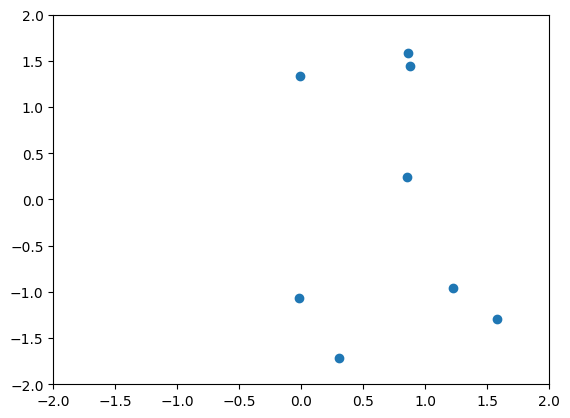

In [213]:
# visualise
iterations = 201
samples = 10
runs = 1000

area_rand, std_rand, x_list, y_list = area_mandelbrot(iterations, samples, runs, 'random', 'visualise')
print(area_rand)

fig, ax = plt.subplots()
ax.scatter(x_list, y_list)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
# ax.grid()
# ax.set_axisbelow(True)
plt.show()

9
1.4097777777777778


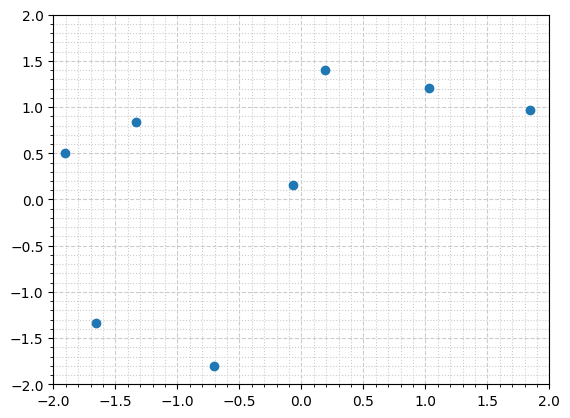

In [235]:
# visualise
iterations = 201
samples = 10
runs = 1000

area_hyper, std_hyper, x_list, y_list = area_mandelbrot(iterations, samples, runs, 'hyper', 'visualise')
print(area_hyper)

fig, ax = plt.subplots()
ax.scatter(x_list, y_list)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')
ax.minorticks_on()
ax.set_axisbelow(True)
plt.show()

9
1.432888888888889


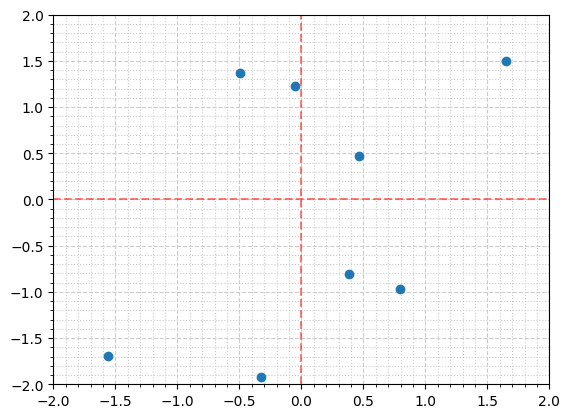

In [205]:
# visualise
iterations = 201
samples = 10
runs = 1000

area_ortho, std_ortho, x_list, y_list = area_mandelbrot(iterations, samples, runs, 'ortho', 'visualise')
print(area_ortho)

fig, ax = plt.subplots()
ax.scatter(x_list, y_list)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')
ax.minorticks_on()
ax.set_axisbelow(True)
plt.axvline(x = 0, color = 'red', linestyle = '--', alpha = 0.5)
plt.axhline(y = 0, color = 'red', linestyle = '--', alpha = 0.5)
plt.show()

In [8]:
def estimated_area(x, y, max_iterations, tot_area = 16):
    x_grid, y_grid = np.meshgrid(x, y)
    complex_grid = x_grid - y_grid * 1j

    in_mandel = 0
    out_mandel = 0
    for c_row in complex_grid:
        for c in c_row:
            n =  mandelbrot_iterations(c, max_iterations)
            if n == max_iterations:
                in_mandel += 1
            else:
                out_mandel += 1
    tot_area = in_mandel + out_mandel

    return (in_mandel/tot_area)*16

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
max_iterations = 201

est_area = estimated_area(x, y, max_iterations)

print(est_area)

1.4912


In [17]:
iterations = 201
samples = 201
runs = 1000

print(area_mandelbrot(iterations, samples, runs, 'random')[:-1])
print(area_mandelbrot(iterations, samples, runs, 'hyper')[:-1])
print(area_mandelbrot(iterations, samples, runs, 'ortho')[:-1])

169
(1.5286153846153845, 0.36284799028295456)
169
(1.5253964497041421, 0.3548648896098421)
169
(1.5030532544378699, 0.3623281231827443)


In [258]:
iterations = 201
samples = 201
runs = 1000

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)

est_area = estimated_area(x, y, max_iterations)

random_area = area_mandelbrot(iterations, samples, runs, 'random')[2]
t_test_rand = stats.ttest_1samp(random_area, popmean= est_area)
conf_rand = t_test_rand.confidence_interval(confidence_level=0.95)
t_statistic_rand, p_value_rand = t_test_rand
print(t_statistic_rand, p_value_rand)
print(conf_rand)
print(f"estimated area = {est_area}")
print(f"random sampling area = {np.mean(random_area)}")

hyper_area = area_mandelbrot(iterations, samples, runs, 'hyper')[2]
t_test_hyper = stats.ttest_1samp(hyper_area, popmean= est_area)
conf_hyper = t_test_hyper.confidence_interval(confidence_level=0.95)
t_statistic_hyper, p_value_hyper = t_test_hyper
print(t_statistic_hyper, p_value_hyper)
print(conf_hyper)
print(f"estimated area = {est_area}")
print(f"hypercube sampling area = {np.mean(hyper_area)}")


ortho_area = area_mandelbrot(iterations, samples, runs, 'ortho')[2]
t_test_ortho = stats.ttest_1samp(ortho_area, popmean= est_area)
conf_ortho = t_test_ortho.confidence_interval(confidence_level=0.95)
t_statistic_ortho, p_value_ortho = t_test_ortho
print(t_statistic_ortho, p_value_ortho)
print(conf_ortho)
print(f"estimated area = {est_area}")
print(f"orthogonal sampling area = {np.mean(ortho_area)}")

169
2.304891287683135 0.021376932884912325
ConfidenceInterval(low=1.4950581049214198, high=1.539261421705799)
estimated area = 1.4912
random sampling area = 1.5171597633136094
169
2.272294227561839 0.023280567497144987
ConfidenceInterval(low=1.4946506481931403, high=1.5383434346470966)
estimated area = 1.4912
hypercube sampling area = 1.5164970414201184
169
0.8882771293650565 0.37460551755531346
ConfidenceInterval(low=1.4789281545414728, high=1.5237700703105985)
estimated area = 1.4912
orthogonal sampling area = 1.5013491124260356
